[71 31 11 74 59 14 27 70 36 40 56 13 65 75 32 34 44 46 17 63]


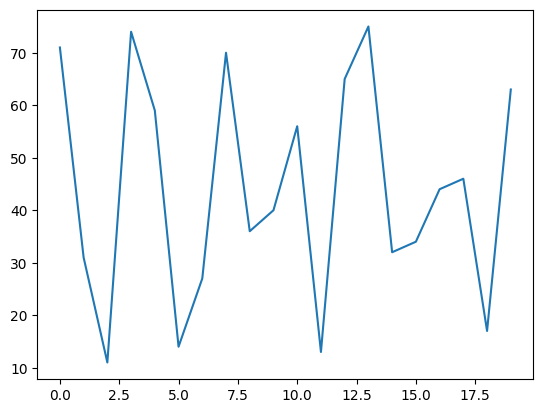

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Генеруємо 20 випадкових величин від 1 до 100

data = np.random.randint(1, 100, 20)
print(data)

plt.plot (data)


In [2]:
# Знайдемо всі впадини в графіку
height = []

if data[0] > data[1]:
    height.append(0)
for i in range(1, len(data) - 1):
    if data[i] > data[i - 1] and data[i] > data[i + 1]:
        height.append(i)
if data[19] > data[18]:
    height.append(19)

# Цикл, який перевіряє умову для створення інтервалів долин
valleys = []
start = height[0]
i = 1
while i < len(height):
    if data[start] <= data[height[i]]:
        valleys.append([start, height[i]])
        start = height[i]
    i += 1

# Цикл, який перевіряє умову для створення інтервалів долин у зворотному напрямку
start = height[len(height) - 1]
i = len(height) - 2
while i >= 0:
    if data[start] <= data[height[i]]:
        valleys.append([height[i], start])
        start = height[i]
    i -= 1

print(valleys)
# Знайдемо найглибшу впадину
deepest_valley = []
deepest_depth = 0

for valley in valleys:
    left_index, right_index = valley[0], valley[-1]
    deepest_point = min(data[left_index:right_index])
    # Знаходимо мінімальну висоту на лівій та правій стороні впадини
    depth_left = data[left_index] - deepest_point
    depth_right = data[right_index] - deepest_point
    # Обчислюємо глибину впадини, враховуючи обидві сторони
    deepest_depth_local = min(depth_right,depth_left)
    if deepest_depth_local>deepest_depth:
        deepest_depth = deepest_depth_local
        deepest_valley = data[left_index:right_index+1]

print(deepest_valley)
print(deepest_depth)

[[0, 3], [3, 13], [13, 19]]
[74 59 14 27 70 36 40 56 13 65 75]
61


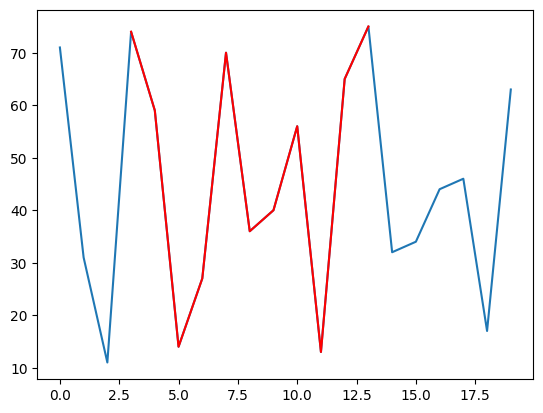

In [3]:
# Покажемо графік з виділеною найглибшою впадиною

plt.plot(data)

# Calculate the offset for the x-values of the red line
offset = np.where(data == deepest_valley[0])[0][0]

# Plot the red line at the specified points
plt.plot(np.arange(offset, offset + len(deepest_valley)), deepest_valley, c='red')

# Show the plot
plt.show()
